**Assignment 3**

_This notebook contains simple starter code to show loading and displaying a pair of test images and the associated flow._

In [1]:
# Adapted helper routine from Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow.

# Common imports
import numpy as np
import os
import skimage 

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "/home/jlang/google-drive/CSI5139/"
NB_ID = "assignment3"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Let's load the image pairs and the corresponding flow 

In [2]:
train_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_images_train.npy'))

In [3]:
train_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_flows_train.npy'))

In [4]:
print('Size of training images: {0} x {1} x {2} x {3}\n'.format(*train_images.shape))
print('Size of flow results: {0} x {1} x {2} x {3}\n'.format(*train_flows.shape))

Size of training images: 1860 x 6 x 64 x 64

Size of flow results: 1860 x 4 x 64 x 64



For RGB images, we need the channels last, e.g., 64x64x3.

In [5]:
def make_RGB(img_arr, img_no, seq_no ): 
    test = np.zeros(img_arr.shape[2:]+(3,))  
    test[:,:,2] = img_arr[img_no,0+3*seq_no,:,:] 
    test[:,:,1] = img_arr[img_no,1+3*seq_no,:,:] 
    test[:,:,0] = img_arr[img_no,2+3*seq_no,:,:]
    return test

In [6]:
def make_Greyscale(img_arr, img_no, seq_no ): 
    return img_arr[img_no,seq_no,:,:] 

Saving figure example_data


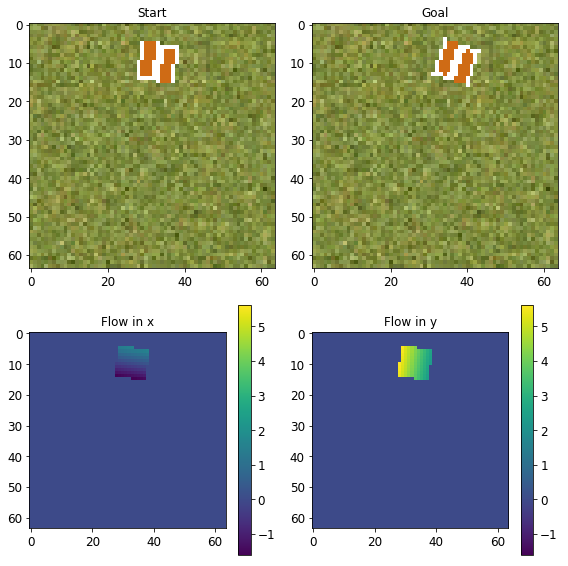

In [7]:
img_num = 101

fig, axes = plt.subplots(2, 2,figsize=(8,8))
axes[0, 0].imshow(make_RGB(train_images, img_num, 0 ))
axes[0, 0].set_title('Start')    

axes[0, 1].imshow(make_RGB(train_images, img_num, 1 ))
axes[0, 1].set_title('Goal')    

# Find the min and max of the flow.
from matplotlib import colors
fl_min = np.min(train_flows[img_num,0:2,:,:])
fl_max = np.max(train_flows[img_num,0:2,:,:])
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)

im = axes[1, 0].imshow(make_Greyscale(train_flows, img_num, 0 ))
im.set_norm(fl_norm)
axes[1, 0].set_title('Flow in x')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(make_Greyscale(train_flows, img_num, 1 ))
im.set_norm(fl_norm)
axes[1, 1].set_title('Flow in y')
fig.colorbar(im,ax=axes[1, 1])

save_fig("example_data")
